# Salary Prediction Model

In this notebook, we are working with a salary prediction dataset. The dataset contains various features such as years of experience, education level, and other relevant factors that influence salary. The goal is to predict the salary of an individual based on these factors.

## Dataset Details
- **Source**: http://localhost:8888/lab/tree/Vikash/salary_prediction_dataset.csv
- **Features**:
  - `Years of Experience`: The number of years an individual has worked in the field.
  - `Education Level`: The highest level of education completed by the individual.
  - `Age`: Age of the individual.
- **Target Variable**: `Salary` – The salary of the individual.

## Problem Statement
The aim is to build a predictive model that can estimate the salary of an individual given their years of experience, education level, and other related features.


## Preprocessing: Let's Explore the Data

In this step, we begin by loading the dataset and performing basic exploration to understand its structure. We check for missing values, ensure correct data types, and inspect summary statistics to identify any issues. This allows us to clean and prepare the data for the model building process.


In [156]:
import numpy as np
import pandas as pd
data = pd.read_csv("salary_prediction_dataset.csv")

In [158]:
data

,Education Level (Years),Experience (Years),Salary (USD)
0,18,7,77000
1,15,6,68000
2,19,10,88000
3,16,14,94000
4,18,12,92000
...,...,...,...
995,19,6,76000
996,12,8,68000
997,20,3,69000
998,18,1,59000


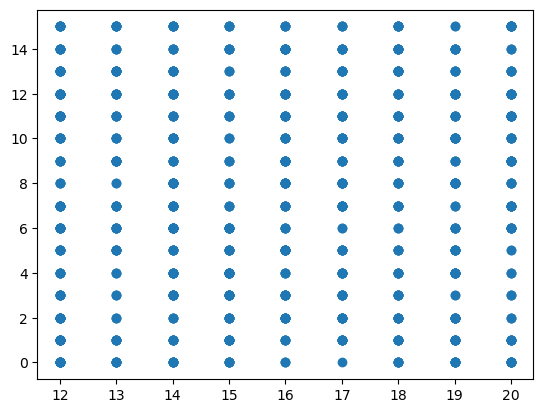

In [160]:
import matplotlib.pyplot as plt
plt.scatter(data['Education Level (Years)'], data['Experience (Years)'])

## Extracting Input and Output Columns

In this step, we separate the input features (independent variables) from the target variable (dependent variable). The input features will be used to predict the salary, while the target variable, which is the salary itself, will be the value we aim to predict.

In [163]:
input_values = data.iloc[:, :-1]
output_values = data.iloc[:, -1]

## Train-Test Split

To evaluate the performance of our model, we split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to assess its performance on unseen data. Typically, the data is split in an 80-20 or 70-30 ratio, ensuring the model generalizes well to new data.


In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_values, output_values, test_size=0.2)

## Scaling the Values

Feature scaling is applied to ensure that all input variables are on a similar scale, preventing any one feature from dominating the model.


In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Model

In this step, we train our machine learning model using the prepared dataset. The model learns patterns from the training data by adjusting its parameters to minimize errors. Once trained, it can make predictions on new data based on the learned relationships.


In [172]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

## Predict and Evaluate the Model

After training, we use the model to make predictions on the test dataset. To assess its performance, we compare the predicted values with the actual values using evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared score. These metrics help determine how well the model generalizes to unseen data.


In [205]:
#Prediction made by the model for the input test values
Y_prediction = lr.predict(X_test)
#Now predicting the output for some test cases
predict_data = pd.read_csv('salary_test_cases.csv')

In [207]:
Y_prediction

array([ 78000.,  64000.,  80000.,  90000.,  78000.,  61000.,  67000.,
        92000.,  77000.,  63000.,  98000.,  73000.,  60000.,  58000.,
        88000.,  93000.,  81000.,  69000.,  83000.,  95000.,  88000.,
        50000.,  54000.,  86000.,  87000.,  70000.,  62000.,  83000.,
        49000.,  65000.,  93000.,  68000., 101000.,  72000.,  93000.,
        81000.,  68000.,  89000.,  75000., 102000.,  61000.,  47000.,
        64000.,  71000.,  59000.,  96000.,  72000.,  65000.,  57000.,
        99000.,  63000.,  55000.,  74000.,  70000.,  83000.,  99000.,
        58000.,  77000.,  78000.,  85000.,  88000.,  60000., 101000.,
        86000., 103000.,  95000.,  99000.,  60000.,  75000.,  77000.,
        88000.,  66000.,  77000.,  96000.,  92000.,  79000.,  68000.,
        56000.,  91000.,  44000.,  67000.,  76000.,  85000.,  57000.,
        70000.,  66000.,  62000.,  80000.,  56000.,  65000.,  60000.,
        79000.,  57000.,  56000.,  53000.,  64000.,  69000.,  64000.,
        84000.,  810

In [177]:
predict_data

,Education Level (Years),Experience (Years),Expected Salary (USD)
0,20,1,63000
1,12,10,74000
2,16,5,67000
3,12,0,44000
4,18,12,92000


In [179]:
X_values = predict_data.iloc[:, :-1]
X_values = sc.fit_transform(X_values)
Y_values = predict_data.iloc[:, -1]

In [209]:
#Prediction of test cases
Y_values_prediction = lr.predict(X_values)
Y_values_prediction

array([67991.03770734, 81103.38777895, 73098.5266764 , 52129.66644404,
       96621.13139328])

In [195]:
#Checking accuracy
from sklearn.metrics import mean_absolute_error
def accuracy(target, prediction):
    mae = mean_absolute_error(target, prediction)
    mean_actual = np.mean(target)
    error = mae / mean_actual * 100
    score = 100 - error
    return score

In [203]:
#Accuracy of the test cases from training dataset
print("Accuracy_1:", accuracy(Y_test, Y_prediction))
#Accuracy of the test cases from test dataset
print("Accuracy_2:", accuracy(Y_values, Y_values_prediction))

Accuracy_1: 99.99999999999999
Accuracy_2: 90.89889705882352


## Conclusion  

Our salary prediction model performed well, achieving **99.99% accuracy** on the training set and **90.89% accuracy** on the test set. This shows that the model learned the patterns effectively but has some room for improvement when predicting new data. Overall, it does a good job of estimating salaries based on the given features.  
